In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt


**1. Generate synthetic data for k-means.**

In [2]:
df = pd.DataFrame()
new_df = pd.DataFrame()
my_dict = {}
k = 5

for i in range(k):
    new_df = pd.DataFrame()
    for j in range(10):
        x = random.randint(1, 100)
        mu, sigma = x*150,x+200
        s = np.random.normal(mu, sigma, 1000)
        new_df[j] = pd.Series(s)
    df = pd.concat([df, new_df],axis=0)




In [3]:
df.head()
df.shape

(5000, 10)

**ploting the attribute**

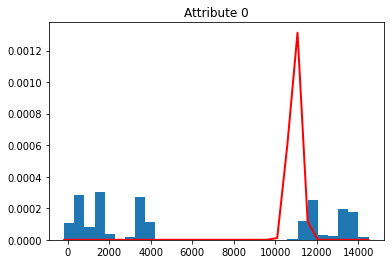

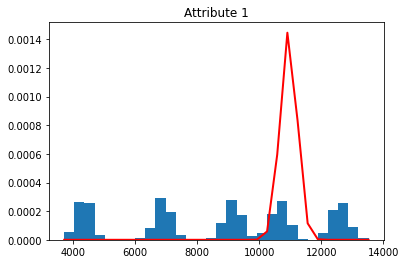

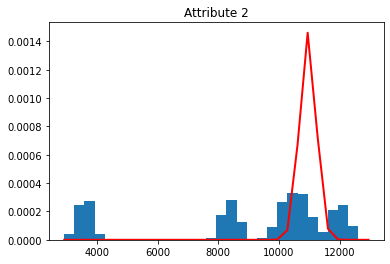

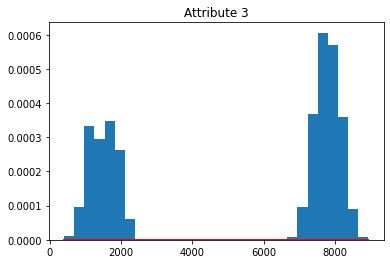

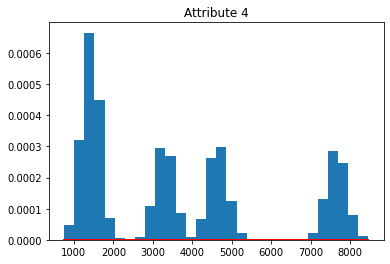

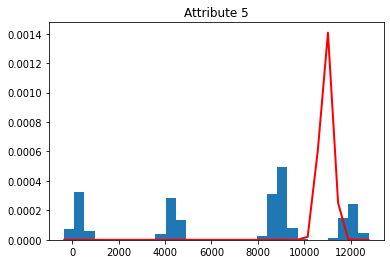

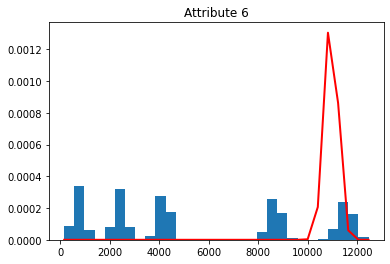

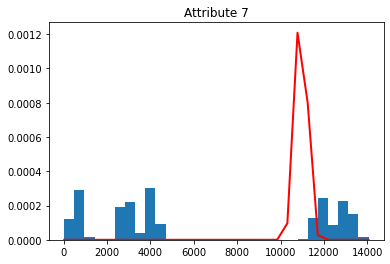

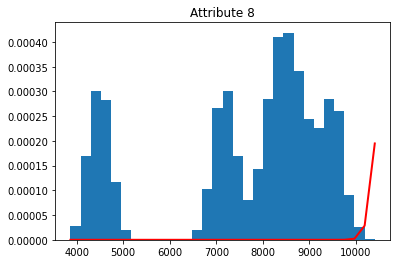

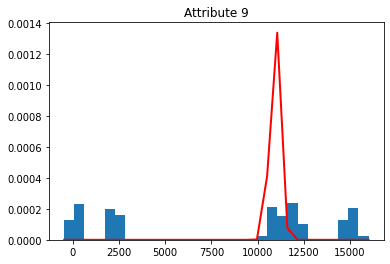

In [4]:



for i in range(10):
  plt.figure()
  count, bins, ignored = plt.hist(df[i], 30, density=True)
  plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
  plt.title("Attribute " +str(i))
  
plt.show()



**2. Implement k-means algorithm on the dataset.**

In [5]:
def random_centriod_selection(K):
    Centroids=np.array([]).reshape(n,0) 

    for i in range(K):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,df.iloc[rand]]
    return Centroids      


In [6]:
def EuclidianDistance_fun(df,k):
  tempDist=np.sum((df-Centroids[:,k])**2,axis=1)
  return tempDist

In [7]:
def ManhatanDistance_fun(df,k):
  tempDist=np.sum(abs(df-Centroids[:,k]),axis=1)
  return tempDist


In [8]:
def plot_clustered_Eucliduendata(K,Centroids,Output):
  color=['red','blue','green','cyan','magenta',"orange",'pink',"black","purple"]
  labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7',"cluster8",'cluster9']
  for k in range(0,K):
      plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
  plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
  plt.xlabel('X-axis')
  plt.ylabel('y-axis')
  plt.title("Euclidien")
  plt.legend()
  plt.show()

In [9]:
def plot_clustered_Manhatandata(K,Centroids,Output):
  color=['red','blue','green','cyan','magenta',"orange",'pink',"black","purple"]
  labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7',"cluster8",'cluster9']
  for k in range(0,K):
      plt.scatter(Output1[k+1][:,0],Output1[k+1][:,1],c=color[k],label=labels[k])
  plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
  plt.xlabel('X-axis')
  plt.ylabel('y-axis')
  plt.title("Manhatan")
  plt.legend()
  plt.show()

In [10]:
m=df.shape[0] #number of training examples
n=df.shape[1] #number of features. Here n=10
n_iter=50
K=5

In [11]:
Centroids=np.array([]).reshape(n,0) 

for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,df.iloc[rand]]

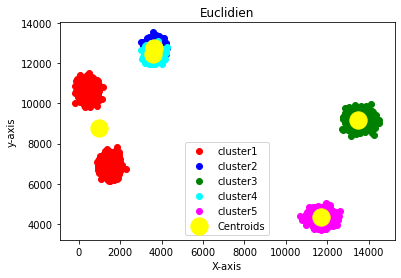

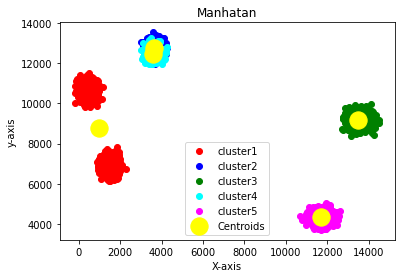

In [12]:


#it will cluter data into 4 clusters
WCSS_array=np.array([])
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    manhatanDist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((df-Centroids[:,k])**2,axis=1)
        tempDist1 = ManhatanDistance_fun(df,k)
  
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        manhatanDist = np.c_[manhatanDist,tempDist1]
    C = np.argmin(EuclidianDistance,axis=1)+1 # get the index where value in min
    C1 = np.argmin(manhatanDist,axis=1)+1
    # print(z.shape)
    Y = {}
    Y1 = {}
    Z = {}
    for k in range(K):
            Y[k+1] = np.array([]).reshape(10,0) # 10x0 array 
            Y1[k+1] = np.array([]).reshape(10,0) # 10x0 array
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],df.iloc[i]]
        Y1[C1[i]]=np.c_[Y1[C1[i]],df.iloc[i]] 
        
    for k in range(K):
        Y[k+1]=Y[k+1].T #take transposev
        Y1[k+1]=Y1[k+1].T #take transposev
        

    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # 10 rows and k=5 columns that a
    Output=Y
    Output1=Y1

    
plot_clustered_Eucliduendata(K,Centroids,Output)
plot_clustered_Manhatandata(K,Centroids,Output1)  


**3.Start with value of k=2 and increase the value much more than your original number of clusters**
---



Running on K >> 2


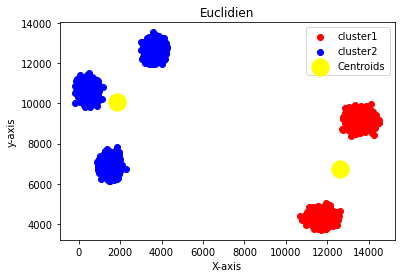

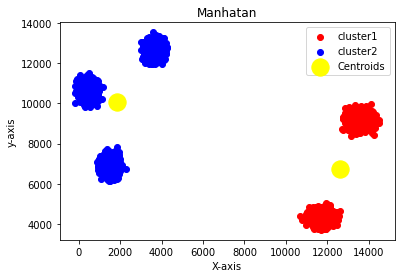

Running on K >> 3


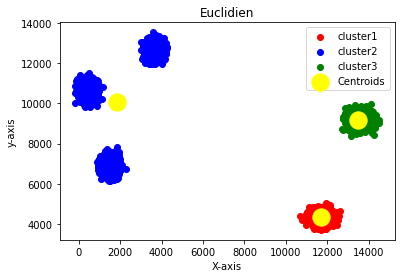

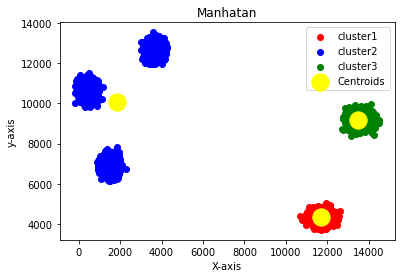

Running on K >> 4


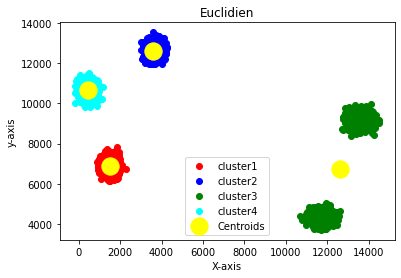

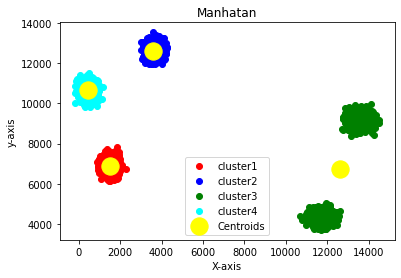

Running on K >> 5


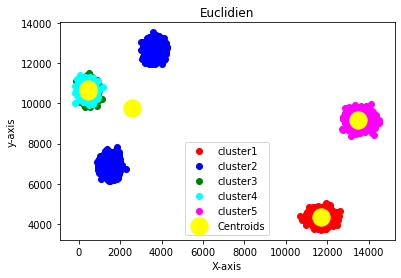

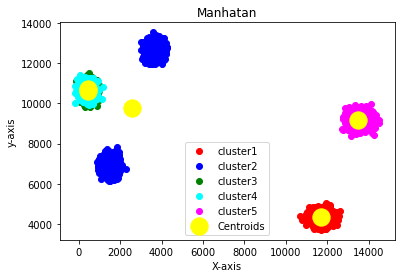

In [13]:
my_dict_data = {}
my_dict_centroid = {}

my_dict_data1 = {}
my_dict_centroid1 = {}

m=df.shape[0] #number of training examples m = 5000
n=df.shape[1] #number of features. Here n=10
n_iter=50

numberof_K = 5
WCSS_array=np.array([])
WCSS_array1=np.array([])
for K in range(2,numberof_K+1):
    print("Running on K >>",K)
    Centroids = random_centriod_selection(K)
    for i in range(n_iter):
        EuclidianDistance=np.array([]).reshape(m,0)
        manhatanDist=np.array([]).reshape(m,0)
    
        for k in range(K):
            #tempDist=np.sum((df-Centroids[:,k])**2,axis=1)
            tempDist = EuclidianDistance_fun(df,k)
            tempDist1 = ManhatanDistance_fun(df,k)
            '''
            {
                1) 1,2,4,5,6,7,8,9,10 } 
                2) 1,2,4,5,6,7,8,9,10 }   -{Centroids[:,1]}
                3) 1,2,4,5,6,7,8,9,10 }
                4) 1,2,4,5,6,7,8,9,10 }
                .
                .
                .
                5000

                1) 1,2,4,5,6,7,8,9,10 } 
                2) 1,2,4,5,6,7,8,9,10 }   -{Centroids[:,2]}
                3) 1,2,4,5,6,7,8,9,10 }
                4) 1,2,4,5,6,7,8,9,10 }
                .
                .
                .
                5000

                1) 1,2,4,5,6,7,8,9,10 } 
                2) 1,2,4,5,6,7,8,9,10 }   -{Centroids[:,5]}
                3) 1,2,4,5,6,7,8,9,10 }
                4) 1,2,4,5,6,7,8,9,10 }
                .
                .
                .
                5000

            }
            5000x5

            '''
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            manhatanDist = np.c_[manhatanDist,tempDist1]

        z = np.min(EuclidianDistance,axis=1)  
        C = np.argmin(EuclidianDistance,axis=1)+1 # get the index where value in min
        C1 = np.argmin(manhatanDist,axis=1)+1
       # print(z.shape)
        Y = {}
        Y1 = {}
        for k in range(K):
            Y[k+1] = np.array([]).reshape(10,0) # 10x0 array 
            Y1[k+1] = np.array([]).reshape(10,0) # 10x0 array
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],df.iloc[i]]
            Y1[C1[i]]=np.c_[Y1[C1[i]],df.iloc[i]] 
           
        for k in range(K):
            Y[k+1]=Y[k+1].T #take transposev
            Y1[k+1]=Y1[k+1].T #take transposev
            

        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0) # 10 rows and k=5 columns that a
        Output=Y
        Output1=Y1
        my_dict_data[K] = Output 
        my_dict_centroid[K] = Centroids
        my_dict_data1[K] = Output
       # plot_clustered_Eucliduendata(K,Centroids,Output) 
    plot_clustered_Eucliduendata(K,Centroids,Output) 
    plot_clustered_Manhatandata(K,Centroids,Output1)  
    wcss_euc=0
    wcss_man=0    
    for k in range(K):
        wcss_euc+=np.sum((Output[k+1]-Centroids[:,k])**2)
        wcss_man+=np.sum((Output1[k+1]-Centroids[:,k])**2)
    WCSS_array=np.append(WCSS_array,wcss_euc)
    WCSS_array1=np.append(WCSS_array1,wcss_man)    
    #print(Centroids) 


**4 For each value of k, report SSE**

<function matplotlib.pyplot.show>

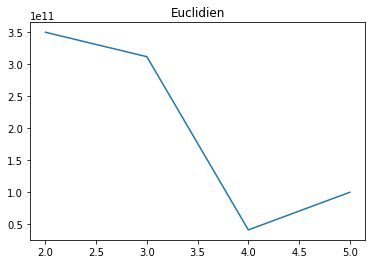

In [14]:
plt.plot(np.arange(2,numberof_K+1,1),WCSS_array)
plt.title("Euclidien")
plt.show

<function matplotlib.pyplot.show>

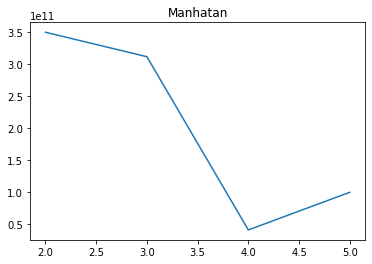

In [15]:
plt.plot(np.arange(2,numberof_K+1,1),WCSS_array1)
plt.title("Manhatan")
plt.show

**5. Finally, draw a plot of SSE versus number of clusters (separately for euclidean and
manhattan distance)**

In [16]:

K_array=np.arange(2,numberof_K+1,1)
K_array


array([2, 3, 4, 5])

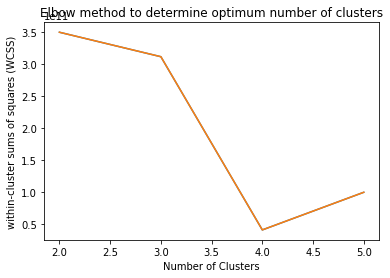

In [17]:
#K_array=np.arange(1,3,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')

plt.plot(K_array,WCSS_array1)

plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')

plt.show()

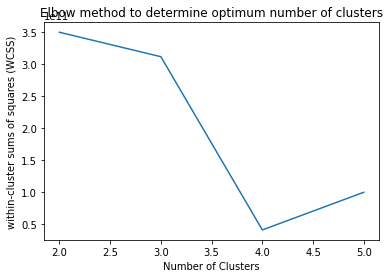

In [18]:
#K_array=np.arange(1,3,1)
plt.plot(K_array,WCSS_array1)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

**my best results are in k = 4**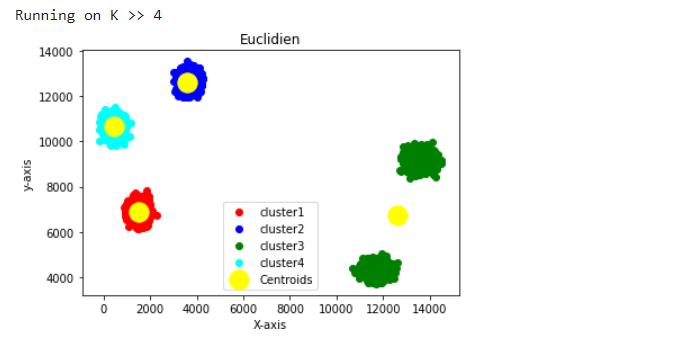